<a href="https://colab.research.google.com/github/namtoptall/DataScience/blob/main/model_training_milestone_project_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Xây dựng hệ thống gợi ý hoa
## Bước 1 - Huấn luyện mô hình : Model training
**Lưu ý ⚠ em huấn luyện mô hình trên google colab nên nếu muốn chạy lại toàn bộ thì cần set up những tài khoản sau :**
> tài khoản kaggle và kaggle API cho việc download bộ dữ liệu

> tài khoản google Drive để kết nối với kho dữ liệu cá nhân



### kết nối với google drive và kaggle

Với kaggle : thực hiện tải tệp kaggle.json(Chứa thông tin tài khoản) lên

In [1]:
from google.colab import files
files.upload()  # Thực hiện tải tệp kaggle.json lên từ máy tính (phải có tài khoản kaggle nha)

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"namdz242221","key":"de869a9575f6ac51974bca65557d88a7"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Mount google drive content vào trong notebook

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!kaggle datasets download -d namdz242221/dsp305x-01-a-vn-dataset

Dataset URL: https://www.kaggle.com/datasets/namdz242221/dsp305x-01-a-vn-dataset
License(s): MIT
 98% 289M/293M [00:12<00:00, 23.0MB/s]
100% 293M/293M [00:12<00:00, 25.3MB/s]


unzip the dataset

In [5]:
!unzip dsp305x-01-a-vn-dataset.zip -d /content/dataset


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/train/Plumeria/001745.jpg  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/train/Plumeria/001746.jpg  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/train/Plumeria/001747.jpg  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/train/Plumeria/001748.jpeg  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/train/Plumeria/001749.jpg  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/train/Plumeria/001750.jpg  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/train/Plumeria/001751.jpg  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/train/Plumeria/001752.png  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/train/Plumeria/001754.jpg  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/train/Plumeria/001755.jpg  
  inflating: /content/dataset/DSP305x_01-A_VN-dataset/train/Plumeria/001757.jpg  
  inflating: /content/dataset/DSP305x_01

In [6]:
!ls /content/dataset

DSP305x_01-A_VN-dataset


check content trong tệp

In [7]:
import os
dataset_dir = "/content/dataset"
for root, dirs, files in os.walk(dataset_dir):
    print(root, "contains", len(files), "files.")


/content/dataset contains 0 files.
/content/dataset/DSP305x_01-A_VN-dataset contains 0 files.
/content/dataset/DSP305x_01-A_VN-dataset/test contains 0 files.
/content/dataset/DSP305x_01-A_VN-dataset/test/Plumeria contains 103 files.
/content/dataset/DSP305x_01-A_VN-dataset/test/Rose contains 106 files.
/content/dataset/DSP305x_01-A_VN-dataset/test/Lotus contains 104 files.
/content/dataset/DSP305x_01-A_VN-dataset/test/Bougainvillea contains 111 files.
/content/dataset/DSP305x_01-A_VN-dataset/test/Plum blossom contains 105 files.
/content/dataset/DSP305x_01-A_VN-dataset/test/Peony contains 104 files.
/content/dataset/DSP305x_01-A_VN-dataset/test/Sunflower contains 102 files.
/content/dataset/DSP305x_01-A_VN-dataset/test/Peach blossom contains 103 files.
/content/dataset/DSP305x_01-A_VN-dataset/test/Chrysanthemum contains 103 files.
/content/dataset/DSP305x_01-A_VN-dataset/test/Orchid contains 105 files.
/content/dataset/DSP305x_01-A_VN-dataset/train contains 0 files.
/content/dataset/DS

check shape của từng ảnh

In [8]:
from PIL import Image
import os
from collections import defaultdict

def check_unique_shapes(dataset_dir):
    # count the number of difference shapes
    shape_counts = defaultdict(int)

    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                try:
                    with Image.open(img_path) as img:
                        shape = img.size  # Lấy kích thước (chiều rộng, chiều cao) của hình ảnh
                        shape_counts[shape] += 1
                except Exception as e:
                    print(f"Error processing image {img_path}: {e}")

    return shape_counts

# Ví dụ sử dụng
dataset_dir = "/content/dataset"
unique_shapes = check_unique_shapes(dataset_dir)

# In ra các shape và số lần xuất hiện
for shape, count in unique_shapes.items():
    print(f"Shape {shape} appears {count} times.")


Shape (224, 224) appears 20711 times.


👉 shape của những ảnh trong dataset là 224,224

### Pre-check

tải file .utils/ETL_functions.py từ thư mục đồ án

In [9]:
from google.colab import files
files.upload()  # Thực hiện tải ETL_functions.py lên từ máy tính

Saving ETL_functions.py to ETL_functions.py


{'ETL_functions.py': b'import os\r\nimport numpy as np\r\nimport pandas as pd\r\nimport tensorflow as tf\r\nfrom PIL import Image, UnidentifiedImageError, ImageEnhance\r\nfrom sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix\r\nimport itertools\r\nimport matplotlib.pyplot as plt\r\nimport datetime\r\n# set the max image pixels to None\r\nImage.MAX_IMAGE_PIXELS = None\r\nimport os\r\n\r\n# Constants\r\nTARGET_IMG_SIZE = 256\r\n\r\nCLASS_LABELS = [\r\n    "Lotus", \r\n    "Chrysanthemum",\r\n    "Peony",\r\n    "Orchid",\r\n    "Sunflower",\r\n    "Bougainvillea",\r\n    "Rose",\r\n    "peach blossom",\r\n    "Plumeria",\r\n    "Plum blossom"\r\n]\r\n\r\ndef extract_image_info(image_path: str) -> dict:\r\n    """\r\n    Extract information from an image file.\r\n\r\n    :param image_path: Full path to the image file.\r\n    :return: A dictionary with extracted image information or None if the file is not a valid image.\r\n    """\r\n    try:\r\n   

In [10]:
import ETL_functions as etl
from ETL_functions import *

### Mở bộ dữ liệu hoa

In [15]:
train_path = "/content/dataset/DSP305x_01-A_VN-dataset/train"
test_path = "/content/dataset/DSP305x_01-A_VN-dataset/test"
val_path = "/content/dataset/DSP305x_01-A_VN-dataset/val"

In [16]:
train= etl.load_dataset(train_path)
test = etl.load_dataset(test_path)
val = etl.load_dataset(val_path)
train

,ImgPath,FileType,Width,Height,Ratio,Mode,Bands,Transparency,Animated,Class
0,/content/dataset/DSP305x_01-A_VN-dataset/train...,jpg,224,224,1.0,RGB,R G B,False,False,Plumeria
1,/content/dataset/DSP305x_01-A_VN-dataset/train...,jpg,224,224,1.0,RGB,R G B,False,False,Plumeria
2,/content/dataset/DSP305x_01-A_VN-dataset/train...,jpg,224,224,1.0,RGB,R G B,False,False,Plumeria
3,/content/dataset/DSP305x_01-A_VN-dataset/train...,jpg,224,224,1.0,RGB,R G B,False,False,Plumeria
4,/content/dataset/DSP305x_01-A_VN-dataset/train...,jpg,224,224,1.0,RGB,R G B,False,False,Plumeria
...,...,...,...,...,...,...,...,...,...,...
18631,/content/dataset/DSP305x_01-A_VN-dataset/train...,jpg,224,224,1.0,RGB,R G B,False,False,Orchid
18632,/content/dataset/DSP305x_01-A_VN-dataset/train...,jpg,224,224,1.0,RGB,R G B,False,False,Orchid
18633,/content/dataset/DSP305x_01-A_VN-dataset/train...,jpg,224,224,1.0,RGB,R G B,False,False,Orchid
18634,/content/dataset/DSP305x_01-A_VN-dataset/train...,jpg,224,224,1.0,RGB,R G B,False,False,Orchid


### Tạo model

#### thiết lập mixed_precision


In [17]:
# Enable mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")
mixed_precision.global_policy()

<DTypePolicy "mixed_float16">

In [18]:
train.shape, test.shape, val.shape

((18636, 10), (1046, 10), (1029, 10))

#### Tạo tensorboard callbacks

In [19]:
import tensorflow as tf
import datetime
from tensorflow.keras.applications import Xception, InceptionV3, VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import os

In [20]:
# Thiết lập thư mục cho TensorBoard logs
log_dir = "logs/fit"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Thiết lập checkpoint để lưu trọng số mô hình tốt nhất
checkpoint_dir = './model_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

xception_checkpoint_path = os.path.join(checkpoint_dir, 'xception_best_weights.weights.h5')
inception_checkpoint_path = os.path.join(checkpoint_dir, 'inception_best_weights.weights.h5')
vgg16_checkpoint_path = os.path.join(checkpoint_dir, 'vgg16_best_weights.weights.h5')

xception_checkpoint = ModelCheckpoint(filepath=xception_checkpoint_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
inception_checkpoint = ModelCheckpoint(filepath=inception_checkpoint_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
vgg16_checkpoint = ModelCheckpoint(filepath=vgg16_checkpoint_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)


#### ImageDataGenerator : load ảnh

In [21]:
#
datagen = ImageDataGenerator(
    rescale=1.0/255,
)

In [22]:
# Create iterators for train, validation, and test data
train_generator = datagen.flow_from_dataframe(train, x_col='ImgPath', y_col='Class', target_size=(224, 224),batch_size=32)
val_generator = datagen.flow_from_dataframe(val, x_col='ImgPath', y_col='Class', target_size=(224, 224), batch_size = 32)
test_generator = datagen.flow_from_dataframe(test, x_col='ImgPath', y_col='Class', target_size=(224, 224), batch_size= 32)


Found 18636 validated image filenames belonging to 10 classes.
Found 1029 validated image filenames belonging to 10 classes.
Found 1046 validated image filenames belonging to 10 classes.


In [23]:
for data_batch, labels_batch in train_generator:
    print("Data batch shape:", data_batch.shape)
    print("Labels batch shape:", labels_batch.shape)
    break

Data batch shape: (32, 224, 224, 3)
Labels batch shape: (32, 10)


#### Build model

In [24]:
def build_model(base_model, num_classes):
    # Freeze the base model
    base_model.trainable = False

    # Define the input layer
    inputs = Input(shape=(224, 224, 3))

    # Pass the input through the base model
    x = base_model(inputs, training=False)

    # Global Average Pooling for downsampling the feature map
    x = GlobalAveragePooling2D()(x)

    # Flatten the output for the fully connected layers
    x = Flatten()(x)

    # Add a fully connected dense layer with ReLU activation
    x = Dense(128, activation="relu")(x)

    # Add a dropout layer for regularization
    x = Dropout(0.5)(x)

    # Final output layer with softmax activation for multi-class classification
    outputs = Dense(num_classes, activation="softmax")(x)

    # Create the model
    model = Model(inputs, outputs)
    return model


#### Compile model  

In [25]:
# Number of classes (e.g., 10 classes for 10 flower types)
num_classes = 10

# Initialize the pre-trained models
vgg16_model = build_model(VGG16(weights="imagenet", include_top=False), num_classes)
xception_model = build_model(Xception(weights="imagenet", include_top=False), num_classes)
inception_model = build_model(InceptionV3(weights="imagenet", include_top=False), num_classes)

# Compile the models with optimizer, loss, and metrics
vgg16_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
xception_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
inception_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [26]:
vgg16_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [27]:
print("Training VGG16 model...")
history_vgg = vgg16_model.fit(train_generator,
                              epochs=10,
                              validation_data=val_generator,
                              callbacks=[vgg16_checkpoint])

Training VGG16 model...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4162 - loss: 1.7551
Epoch 1: val_accuracy improved from -inf to 0.79203, saving model to ./model_checkpoints/vgg16_best_weights.weights.h5
583/583 ━━━━━━━━━━━━━━━━━━━━ 69s 76ms/step - accuracy: 0.4165 - loss: 1.7544 - val_accuracy: 0.7920 - val_loss: 0.7332
Epoch 2/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7459 - loss: 0.8076
Epoch 2: val_accuracy improved from 0.79203 to 0.87464, saving model to ./model_checkpoints/vgg16_best_weights.weights.h5
583/583 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.7460 - loss: 0.8075 - val_accuracy: 0.8746 - val_loss: 0.4601
Epoch 3/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8291 - loss: 0.5534
Epoch 3: val_accuracy improved from 0.87464 to 0.91740, saving model to ./model_checkpoints/vgg16_best_weights.weights.h5
583/583 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - accuracy: 0.8292 - loss: 0.5533 - val_accuracy: 0.9174 - val_loss: 0.3191
Epoch 4/10
583/583 ━━━━━━━━━━━

In [28]:
xception_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,125,042 (80.59 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [29]:
print("Training Xception model...")

history_xception = xception_model.fit(train_generator,
                                  epochs=10,
                                  validation_data=val_generator,
                                  callbacks=[xception_checkpoint])

Training Xception model...
Epoch 1/10
582/583 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6758 - loss: 0.9901
Epoch 1: val_accuracy improved from -inf to 0.96210, saving model to ./model_checkpoints/xception_best_weights.weights.h5
583/583 ━━━━━━━━━━━━━━━━━━━━ 50s 62ms/step - accuracy: 0.6763 - loss: 0.9888 - val_accuracy: 0.9621 - val_loss: 0.1682
Epoch 2/10
582/583 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9347 - loss: 0.2207
Epoch 2: val_accuracy improved from 0.96210 to 0.97473, saving model to ./model_checkpoints/xception_best_weights.weights.h5
583/583 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - accuracy: 0.9347 - loss: 0.2206 - val_accuracy: 0.9747 - val_loss: 0.0786
Epoch 3/10
582/583 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9638 - loss: 0.1275
Epoch 3: val_accuracy improved from 0.97473 to 0.98445, saving model to ./model_checkpoints/xception_best_weights.weights.h5
583/583 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - accuracy: 0.9638 - loss: 0.1275 - val_accuracy: 0.9845 - 

In [30]:
inception_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,066,346 (84.18 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [31]:
# Train the models
print("Training Inception model...")

history_inception = inception_model.fit(train_generator, epochs=10,
                                     validation_data=val_generator,
                                     callbacks=[inception_checkpoint])


Training Inception model...
Epoch 1/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5533 - loss: 1.3150
Epoch 1: val_accuracy improved from -inf to 0.90865, saving model to ./model_checkpoints/inception_best_weights.weights.h5
583/583 ━━━━━━━━━━━━━━━━━━━━ 70s 82ms/step - accuracy: 0.5536 - loss: 1.3143 - val_accuracy: 0.9086 - val_loss: 0.3335
Epoch 2/10
582/583 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8401 - loss: 0.4665
Epoch 2: val_accuracy improved from 0.90865 to 0.94655, saving model to ./model_checkpoints/inception_best_weights.weights.h5
583/583 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - accuracy: 0.8402 - loss: 0.4664 - val_accuracy: 0.9466 - val_loss: 0.1660
Epoch 3/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8944 - loss: 0.3126
Epoch 3: val_accuracy improved from 0.94655 to 0.97085, saving model to ./model_checkpoints/inception_best_weights.weights.h5
583/583 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.8944 - loss: 0.3126 - val_accuracy: 0.970

### So sánh và chọn model tốt nhất cho bước tiếp theo

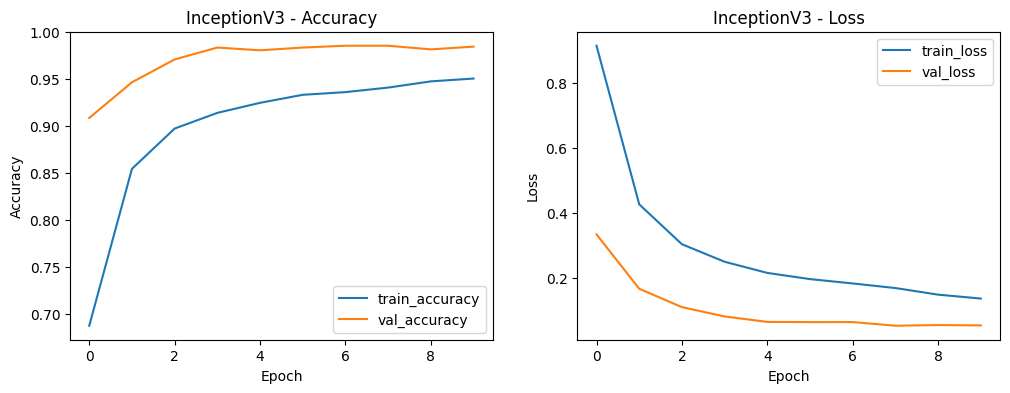

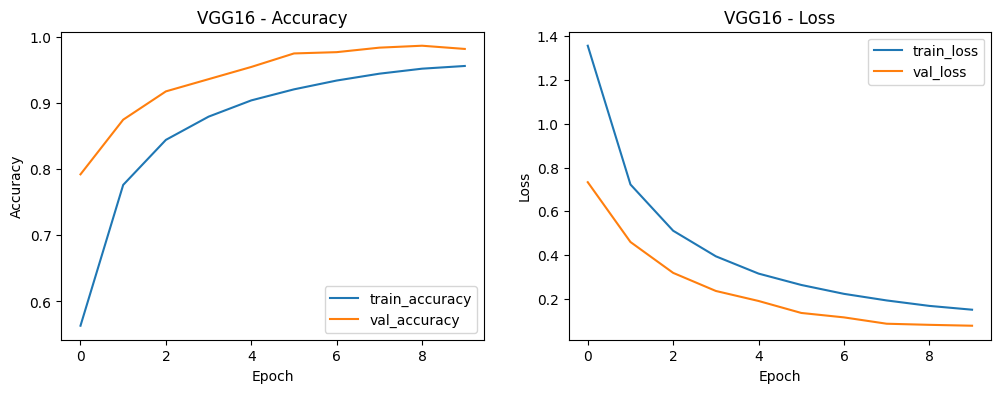

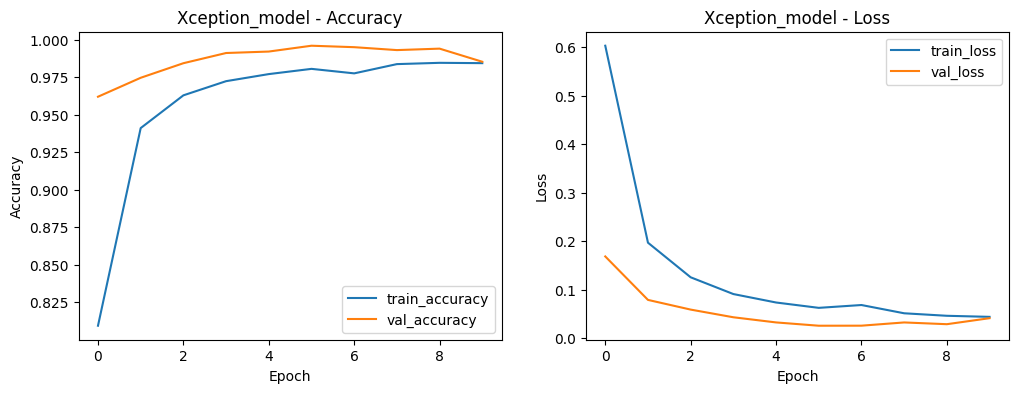

In [32]:
import matplotlib.pyplot as plt

def plot_history(histories, titles):
    for i, history in enumerate(histories):
        plt.figure(figsize=(12, 4))
        # Plot accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='train_accuracy')
        plt.plot(history.history['val_accuracy'], label='val_accuracy')
        plt.title(f'{titles[i]} - Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='train_loss')
        plt.plot(history.history['val_loss'], label='val_loss')
        plt.title(f'{titles[i]} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()

# Plot histories
plot_history([history_inception, history_vgg, history_xception],
             ['InceptionV3', 'VGG16', 'Xception_model'])

👉 em sẽ chọn model Xception

## Load model-weights để fine-tune

In [465]:
# load weights :
xception_model.load_weights(xception_checkpoint_path)

In [466]:
# In ra tên của mỗi lớp và trạng thái có thể train (trainable) của chúng
for layer in xception_model.layers:
    print(f'Layer Name: {layer.name}, Trainable: {layer.trainable}')

Layer Name: input_layer_3, Trainable: True
Layer Name: xception, Trainable: False
Layer Name: global_average_pooling2d_1, Trainable: True
Layer Name: flatten_1, Trainable: True
Layer Name: dense_2, Trainable: True
Layer Name: dropout_1, Trainable: True
Layer Name: dense_3, Trainable: True


### Mở thêm layer

In [467]:
# mở xception
xception_base = xception_model.get_layer('xception')
# Mở khóa các lớp trong Block13 và Block14
for layer in xception_base.layers:
    if 'block14' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False  # Giữ nguyên các lớp khác không thay đổi

In [468]:
# In ra tên của mỗi lớp và trạng thái có thể train (trainable) của chúng
for layer in xception_model.layers:
    print(f'Layer Name: {layer.name}, Trainable: {layer.trainable}')

Layer Name: input_layer_3, Trainable: True
Layer Name: xception, Trainable: False
Layer Name: global_average_pooling2d_1, Trainable: True
Layer Name: flatten_1, Trainable: True
Layer Name: dense_2, Trainable: True
Layer Name: dropout_1, Trainable: True
Layer Name: dense_3, Trainable: True


In [469]:
# check layers inside the xception layers
for layer in xception_base.layers:
    print(f'Layer Name: {layer.name}, Trainable: {layer.trainable}')

Layer Name: input_layer_2, Trainable: False
Layer Name: block1_conv1, Trainable: False
Layer Name: block1_conv1_bn, Trainable: False
Layer Name: block1_conv1_act, Trainable: False
Layer Name: block1_conv2, Trainable: False
Layer Name: block1_conv2_bn, Trainable: False
Layer Name: block1_conv2_act, Trainable: False
Layer Name: block2_sepconv1, Trainable: False
Layer Name: block2_sepconv1_bn, Trainable: False
Layer Name: block2_sepconv2_act, Trainable: False
Layer Name: block2_sepconv2, Trainable: False
Layer Name: block2_sepconv2_bn, Trainable: False
Layer Name: conv2d, Trainable: False
Layer Name: block2_pool, Trainable: False
Layer Name: batch_normalization, Trainable: False
Layer Name: add, Trainable: False
Layer Name: block3_sepconv1_act, Trainable: False
Layer Name: block3_sepconv1, Trainable: False
Layer Name: block3_sepconv1_bn, Trainable: False
Layer Name: block3_sepconv2_act, Trainable: False
Layer Name: block3_sepconv2, Trainable: False
Layer Name: block3_sepconv2_bn, Trainabl

### Thêm layer để tạo ra model cuối cùng

In [470]:
# Lấy output của lớp cuối cùng sau khi đã unfreeze
x = xception_model.get_layer('global_average_pooling2d_1').output

# Thêm các lớp mới để giảm thiểu overfitting
x = BatchNormalization()(x)
x = Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)

# Tạo mô hình mới với các lớp đã được fine-tune và các lớp mới thêm vào
tune_xception_model = Model(inputs=xception_model.input, outputs=outputs)

# Biên dịch lại mô hình
tune_xception_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

# Kiểm tra lại kiến trúc mô hình
tune_xception_model.summary()


Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_132              │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,133,234 (80.62 MB)

 Trainable params: 5,016,458 (19.14 MB)

 Non-trainable params: 16,116,776 (61.48 MB)

### Thiết lập checkpoint và callback cho finetune model

In [471]:
#import reducelronplateau callback
from tensorflow.keras.callbacks import ReduceLROnPlateau
checkpoint_dir = '/content/drive/MyDrive/Funix_Capstione_model/'
os.makedirs(checkpoint_dir, exist_ok=True)

# Define the ModelCheckpoint callback
fine_tune_checkpoint = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'xception_finetune_best_weights.weights.h5'),
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

# Define the EarlyStopping callback
tune_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Define the TensorBoard callback
tune_tensorboard_callback = TensorBoard(
    log_dir="logs/fit_finetune",
    histogram_freq=1
)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    verbose=1,
    min_lr=1e-6
)


### Data augmentation truoc khi train

 tăng batch_size và drop_out

In [472]:
# Check if the generator yields data correctly
for data_batch, labels_batch in finetune_val_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break  # Only check the first batch

data batch shape: (5, 224, 224, 3)
labels batch shape: (5, 10)


In [473]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator with recommended augmentations
finetune_datagen = ImageDataGenerator(
    rescale=1./255,                  # Normalize the images
    horizontal_flip=True,            # Flip the images horizontally
    rotation_range=10,               # Randomly rotate the images
    zoom_range=0.1,                  # Apply random zoom
    width_shift_range=0.2,           # Randomly shift the width
    height_shift_range=0.2,          # Randomly shift the height
    shear_range=0.1,                 # Apply random shear transformation
)

In [474]:
# Load the training, validation, and test datasets
finetune_train_generator = finetune_datagen.flow_from_dataframe(
    train,
    x_col='ImgPath',
    y_col='Class',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True

)

finetune_val_generator = finetune_datagen.flow_from_dataframe(
    val,
    x_col='ImgPath',
    y_col='Class',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True

)

finetune_test_generator = finetune_datagen.flow_from_dataframe(
    test,
    x_col='ImgPath',
    y_col='Class',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True
)

Found 18636 validated image filenames belonging to 10 classes.
Found 1029 validated image filenames belonging to 10 classes.
Found 1046 validated image filenames belonging to 10 classes.


### Fit model

#### tính toán steps

In [475]:
# To handle potential run-out of data in validation, we use an infinite generator loop
def infinite_generator(generator):
    while True:
        for batch in generator:
            yield batch


# Calculate the correct steps_per_epoch and validation_steps
batch_size = 32
steps_per_epoch = int(len(finetune_train_generator) *0.1)
validation_steps = int(len(finetune_val_generator)*0.1)


In [476]:
from tensorflow.keras.optimizers import Adam
history_fine_tune = tune_xception_model.fit(
    finetune_train_generator,
    steps_per_epoch=steps_per_epoch,  # Train on all batches in one epoch
    epochs=40,
    validation_data=infinite_generator(finetune_val_generator),
    validation_steps=validation_steps,
    callbacks=[fine_tune_checkpoint, tune_tensorboard_callback, tune_early_stopping, reduce_lr]
)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.1036 - loss: 3.6673
Epoch 1: val_loss improved from inf to 2.52919, saving model to /content/drive/MyDrive/Funix_Capstione_model/xception_finetune_best_weights.weights.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 492ms/step - accuracy: 0.1038 - loss: 3.6661 - val_accuracy: 0.1875 - val_loss: 2.5292 - learning_rate: 1.0000e-05
Epoch 2/40
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.1684 - loss: 3.1531
Epoch 2: val_loss improved from 2.52919 to 2.35276, saving model to /content/drive/MyDrive/Funix_Capstione_model/xception_finetune_best_weights.weights.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 444ms/step - accuracy: 0.1686 - loss: 3.1516 - val_accuracy: 0.2083 - val_loss: 2.3528 - learning_rate: 1.0000e-05
Epoch 3/40
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.2275 - loss: 2.8286
Epoch 3: val_loss improved from 2.35276 to 2.16486, saving model to /content/drive/MyDrive/Funix_Capstione_model/xception_finetune_best_weights.weights.h5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 11: val_loss improved from 1.23918 to 1.01091, saving model to /content/drive/MyDrive/Funix_Capstione_model/xception_finetune_best_weights.weights.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.5723 - loss: 1.5320 - val_accuracy: 0.8261 - val_loss: 1.0109 - learning_rate: 1.0000e-05
Epoch 12/40
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.5600 - loss: 1.5526
Epoch 12: val_loss did not improve from 1.01091
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 387ms/step - accuracy: 0.5599 - loss: 1.5530 - val_accuracy: 0.8021 - val_loss: 1.0527 - learning_rate: 1.0000e-05
Epoch 13/40
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5926 - loss: 1.4670
Epoch 13: val_loss did not improve from 1.01091
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 379ms/step - accuracy: 0.5924 - loss: 1.4673 - val_accuracy: 0.7292 - val_loss: 1.2111 - learning_rate: 1.0000e-05
Epoch 14/40
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.6367 - loss: 1.3466
Epoch 14: val_loss improved from 1.01091 to 0.9191

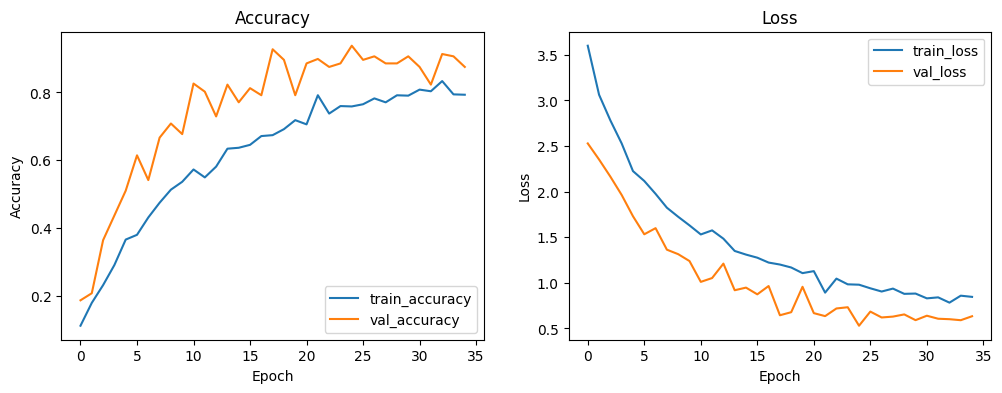

In [481]:
# plot accuracy and loss
def plot_accuracy_and_loss(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_accuracy_and_loss(history_fine_tune)


In [482]:
# đánh giá mô hình
test_loss, test_accuracy = tune_xception_model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9004 - loss: 0.6016
Test Loss: 0.5941385626792908, Test Accuracy: 0.899617612361908


In [483]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def print_evaluation_metrics(y_true, y_pred, class_names):
    """
    Print evaluation metrics including Precision, Recall, F1-Score, and Confusion Matrix.

    Parameters:
    y_true (array-like): True class labels.
    y_pred (array-like): Predicted class labels.
    class_names (list): List of class names corresponding to the labels.
    """
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy:.4f}')

    # Precision, Recall, F1-Score
    print("\nClassification Report:")
    report = classification_report(y_true, y_pred, target_names=class_names)
    print(report)

    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    # Precision, Recall, F1-Score for each class
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)

    print("\nPer Class Metrics:")
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-Score = {f1[i]:.4f}")

print_evaluation_metrics(finetune_test_generator.classes, np.argmax(tune_xception_model.predict(finetune_test_generator), axis=-1), finetune_test_generator.class_indices)

33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 318ms/step
Accuracy: 0.1099

Classification Report:
               precision    recall  f1-score   support

Bougainvillea       0.11      0.12      0.11       111
Chrysanthemum       0.08      0.08      0.08       103
        Lotus       0.13      0.12      0.13       104
       Orchid       0.16      0.17      0.17       105
Peach blossom       0.08      0.09      0.09       103
        Peony       0.14      0.15      0.15       104
 Plum blossom       0.13      0.12      0.13       105
     Plumeria       0.08      0.08      0.08       103
         Rose       0.10      0.09      0.10       106
    Sunflower       0.07      0.07      0.07       102

     accuracy                           0.11      1046
    macro avg       0.11      0.11      0.11      1046
 weighted avg       0.11      0.11      0.11      1046


Confusion Matrix:
[[13 11  8 11  9  7 19 10  9 14]
 [18  8 13  6 19  8  6 11  7  7]
 [11 16 13  7  9 11 10 10  7 10]
 [15  7  9 18 12 10 11  4 

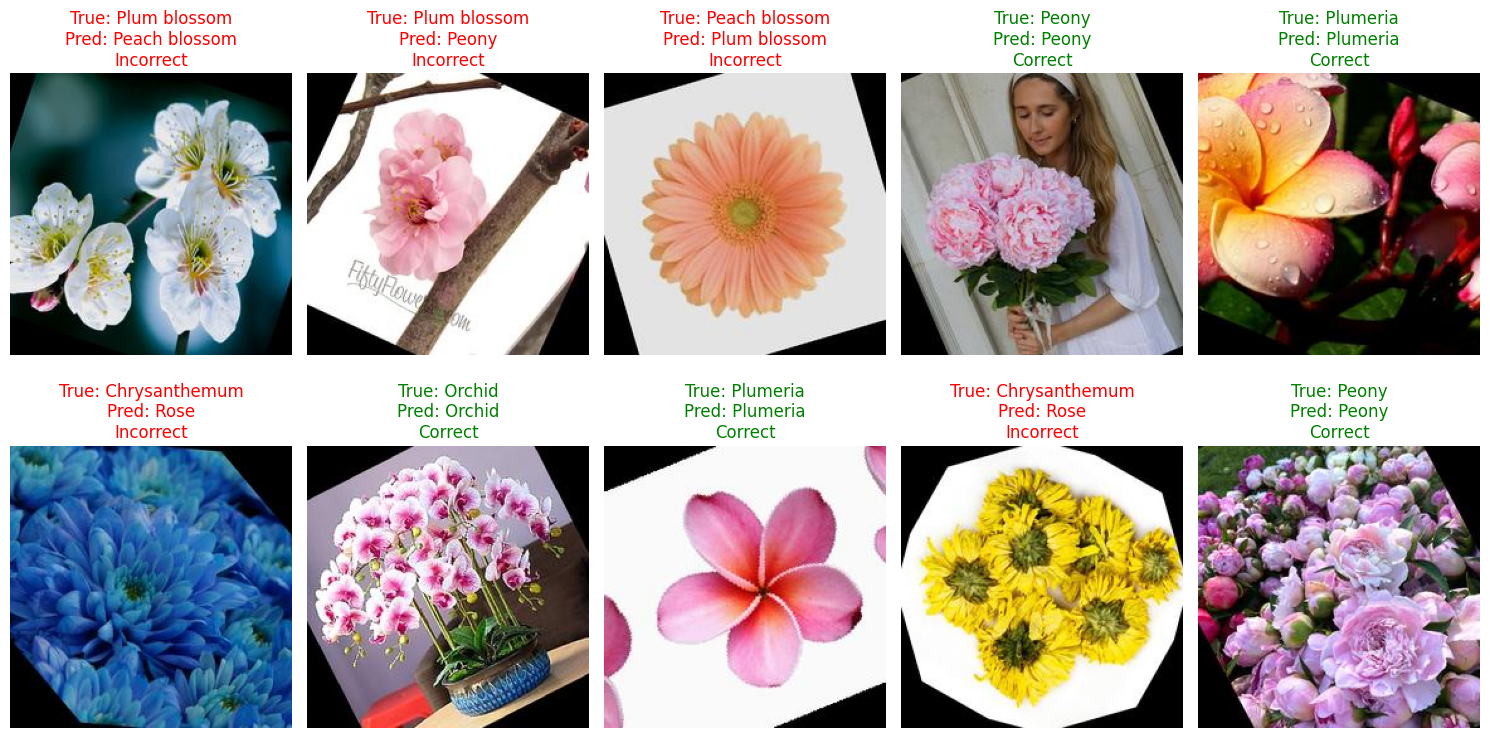

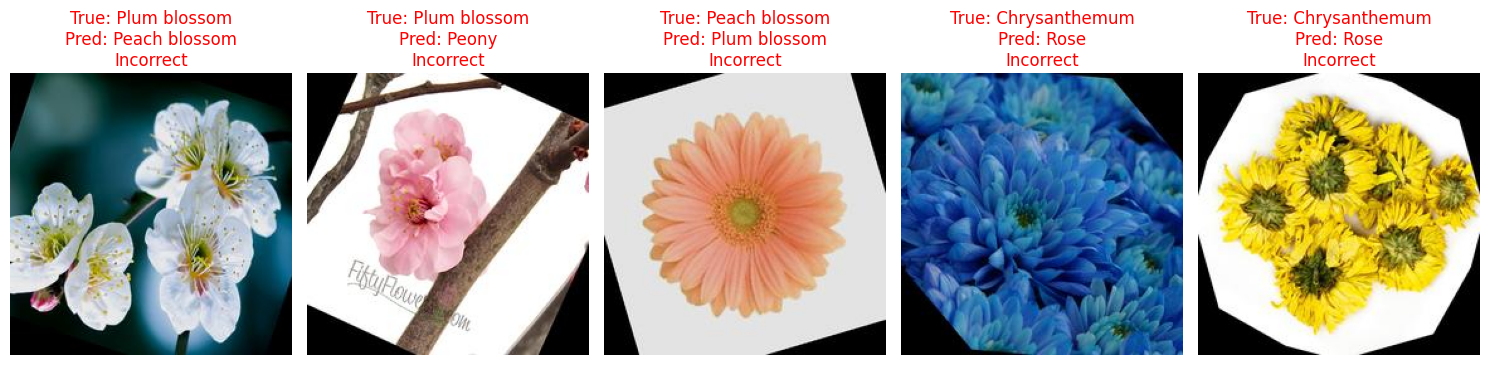

,ImgPath,FileType,Width,Height,Ratio,Mode,Bands,Transparency,Animated,Class
861,/content/dataset/DSP305x_01-A_VN-dataset/test/...,jpg,224,224,1.0,RGB,R G B,False,False,Plum blossom
159,/content/dataset/DSP305x_01-A_VN-dataset/test/...,jpg,224,224,1.0,RGB,R G B,False,False,Plum blossom
743,/content/dataset/DSP305x_01-A_VN-dataset/test/...,jpg,224,224,1.0,RGB,R G B,False,False,Peach blossom
410,/content/dataset/DSP305x_01-A_VN-dataset/test/...,jpg,224,224,1.0,RGB,R G B,False,False,Peony
103,/content/dataset/DSP305x_01-A_VN-dataset/test/...,jpg,224,224,1.0,RGB,R G B,False,False,Plumeria
755,/content/dataset/DSP305x_01-A_VN-dataset/test/...,jpg,224,224,1.0,RGB,R G B,False,False,Chrysanthemum
819,/content/dataset/DSP305x_01-A_VN-dataset/test/...,jpg,224,224,1.0,RGB,R G B,False,False,Orchid
683,/content/dataset/DSP305x_01-A_VN-dataset/test/...,jpg,224,224,1.0,RGB,R G B,False,False,Plumeria
328,/content/dataset/DSP305x_01-A_VN-dataset/test/...,jpg,224,224,1.0,RGB,R G B,False,False,Chrysanthemum
531,/content/dataset/DSP305x_01-A_VN-dataset/test/...,jpg,224,224,1.0,RGB,R G B,False,False,Peony


In [480]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def visualize_predictions(dataframe, model, num_images=10):
    # Shuffle the dataframe
    dataframe = dataframe.sample(frac=1).reset_index(drop=True)

    # Randomly select a number of images
    random_indices = np.random.choice(dataframe.index, size=num_images, replace=False)
    selected_images = dataframe.loc[random_indices]

    # Create a figure with subplots for all selected images
    fig, axes = plt.subplots(2, 5, figsize=(15, 8))

    false_predictions = []  # List to store false predictions

    # Iterate over the selected images
    for i, (index, row) in enumerate(selected_images.iterrows()):
        img_path = row['ImgPath']
        true_class_name = row['Class']

        # Load the image
        img = plt.imread(img_path)

        # Preprocess the image for model prediction
        img_preprocessed = image.img_to_array(image.load_img(img_path, target_size=(224, 224)))
        img_preprocessed = np.expand_dims(img_preprocessed, axis=0) / 255.0

        # Make a prediction
        pred = model.predict(img_preprocessed, verbose=0)
        predicted_class_index = np.argmax(pred)
        predicted_class_name = dataframe['Class'].unique()[predicted_class_index]

        # Check if the prediction is correct
        is_correct = true_class_name == predicted_class_name

        if not is_correct:
            false_predictions.append((img, true_class_name, predicted_class_name))  # Store the false prediction

        # Plot the image in the corresponding subplot
        ax = axes[i // 5, i % 5]
        ax.imshow(img)
        ax.set_title(f"True: {true_class_name}\nPred: {predicted_class_name}\n{'Correct' if is_correct else 'Incorrect'}",
                     color='green' if is_correct else 'red')
        ax.axis('off')

    # Adjust layout and show the plot for all images
    plt.tight_layout()
    plt.show()

    # Create a figure for false predictions only
    if false_predictions:
        fig, axes = plt.subplots(1, len(false_predictions), figsize=(15, 5))
        for i, (img, true_class_name, predicted_class_name) in enumerate(false_predictions):
            ax = axes[i]
            ax.imshow(img)
            ax.set_title(f"True: {true_class_name}\nPred: {predicted_class_name}\nIncorrect",
                         color='red')
            ax.axis('off')

        # Adjust layout and show the plot for false predictions
        plt.tight_layout()
        plt.show()

    return selected_images

# Call the function to visualize random predictions and false predictions
visualize_predictions(test, model=tune_xception_model)


# Lưu mô hình vào drive

In [ ]:
# Tạo save path vào drive
save_dir = "/content/drive/MyDrive/Funix_Capstione_model/Funix_Capstone_model.keras"
# os.makedirs(save_dir) # Tạo directory nếu nó không tồn tại

# Lưu mô hình
tune_xception_model.save(save_dir)